<a href="https://colab.research.google.com/github/DeepakChothe/Assignment1/blob/main/Shubham_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data=pd.read_excel('/content/drive/MyDrive/Lung cancer data.xls')

In [3]:
data.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,True
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,True
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,False
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,False
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,False


In [4]:
data['lung_cancer'].value_counts()

True     270
False     39
Name: lung_cancer, dtype: int64

In [5]:
data.describe()

,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


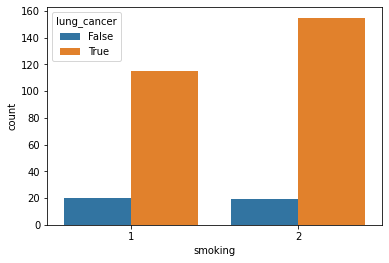

In [6]:
sns.countplot(data['smoking'],hue=data['lung_cancer'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


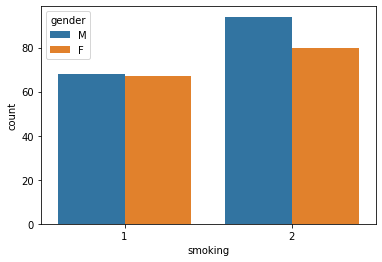

In [7]:
sns.countplot(data['smoking'],hue=data['gender'])

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['lung_cancernew']=le.fit_transform(data['lung_cancer'])
data=data.drop('lung_cancer',axis=1)

In [9]:
data['gender']=pd.get_dummies(data['gender'])

In [10]:
data.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancernew
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [11]:
x=data.drop('lung_cancernew',axis=1)
y=data['lung_cancernew']


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_new=sc.fit_transform(x_train)
x_test_new=sc.transform(x_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [15]:
knn = KNeighborsClassifier(n_neighbors=8) # Square Euclidean distance model
knn.fit(x_train_new,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [16]:
y_pred=knn.predict(x_test_new)

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 3,  5],
       [ 0, 70]])

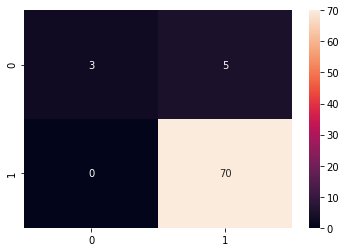

In [18]:
sns.heatmap(cm,annot=True)

In [19]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.93      1.00      0.97        70

    accuracy                           0.94        78
   macro avg       0.97      0.69      0.76        78
weighted avg       0.94      0.94      0.92        78



In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [21]:
model_new_svm=GridSearchCV(svm.SVC(gamma='auto'),{'C':[1,20,40],'kernel':['rbf','linear']},cv=5,return_train_score=False)
model_new_svm.fit(x_train_new,y_train)
model_new_svm.cv_results_

{'mean_fit_time': array([0.0020803 , 0.00153794, 0.00136609, 0.00422001, 0.001335  ,
        0.01387725]),
 'mean_score_time': array([0.00063334, 0.0003902 , 0.00045328, 0.00037913, 0.00045791,
        0.00038209]),
 'mean_test_score': array([0.87881591, 0.90027752, 0.87446809, 0.88751156, 0.87446809,
        0.88316374]),
 'param_C': masked_array(data=[1, 1, 20, 20, 40, 40],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'},
  {'C': 40, 'kernel': 'rbf'},
  {'C': 40, 'kernel': 'linear'}],
 'rank_test_score': array([4, 1, 5, 2, 5, 3], dtype=int32),
 'split0_test_score': array([0.87234043, 0.93

In [22]:
df=pd.DataFrame(model_new_svm.cv_results_)
tabel=df[['params','mean_test_score']]
tabel

,params,mean_test_score
0,"{'C': 1, 'kernel': 'rbf'}",0.878816
1,"{'C': 1, 'kernel': 'linear'}",0.900278
2,"{'C': 20, 'kernel': 'rbf'}",0.874468
3,"{'C': 20, 'kernel': 'linear'}",0.887512
4,"{'C': 40, 'kernel': 'rbf'}",0.874468
5,"{'C': 40, 'kernel': 'linear'}",0.883164


In [24]:
model_final=svm.SVC(kernel='rbf',C=1,gamma='auto')
model_final.fit(x_train_new,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
y_pred=model_final.predict(x_test_new)

In [26]:

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 3,  5],
       [ 0, 70]])

In [27]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.93      1.00      0.97        70

    accuracy                           0.94        78
   macro avg       0.97      0.69      0.76        78
weighted avg       0.94      0.94      0.92        78

